In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/katew/Downloads/Copy of Ricoh_Opps_08022024.xlsx')

df.head()

,Key,Lead_Number,Opportunity_Number,Quote_Number,Order_Number,L2_RISE_Number,Funnel_Stage,Lead_Status_Name,Lead_Sub_Source,Lead_Primary_Product,...,svc_calls,cv,mif,renewal,sat,nps,department,job_type,Employees_DNB,Sales_DNB
0,O-1001591177,NaN,O-1001591177,NaN,NaN,A-1000882103,SQL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,1965.0,2.346090e+06
1,O-1000558710,NaN,O-1000558710,NaN,NaN,A-0013759349,SQL,NaN,NaN,NaN,...,2233.0,144586274.0,1670.0,0.0,NaN,NaN,Operations / Compliance / Reco,Director,1683.0,2.579766e+09
2,O-1002059945,NaN,O-1002059945,NaN,NaN,A-0013508952,SQL,NaN,NaN,NaN,...,3210.0,719873594.0,26046.0,1.0,NaN,NaN,Procurement / Purchasing,Consultant,275502.0,8.529614e+10
3,O-1002269225,NaN,O-1002269225,NaN,NaN,A-1000882135,SQL,NaN,NaN,NaN,...,3501.0,379055914.0,2485.0,1105.0,8.67,8.33,Administration,Manager / Supervisor,230.0,3.033240e+07
4,O-1001952436,NaN,O-1001952436,NaN,NaN,A-0013508952,SQL,NaN,NaN,NaN,...,3089.0,725387056.0,26098.0,2.0,NaN,NaN,NaN,Director,275502.0,8.529614e+10


In [2]:
# NAs
na_counts = df.isna().sum()
print(na_counts[na_counts > 0])


Lead_Number           681241
Opportunity_Number    117470
Quote_Number          338832
Order_Number          523180
L2_RISE_Number         74589
                       ...  
nps                   712143
department            510780
job_type              492803
Employees_DNB          74632
Sales_DNB              74632
Length: 62, dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Quote_Number', 'Order_Number', 'A4_BW_Flag', 'A4_C_Flag', 'A3_BW_Flag',
       'A3_C_Flag', 'Docuware_Flag', 'RansomCare_Flag', 'IT_Health_Check_Flag',
       'MS_Flag', 'PP_BW_CS_Flag', 'PP_C_CS_Flag', 'WF_BW_Flag', 'WF_C_Flag',
       'BW_LP_Flag', 'Color_LP_Flag', 'MFP_Flag', 'MindSHIFT_flag', 'Opp_Rev',
       'Quote_Rev', 'Order_Rev', 'Closed', 'Has_Lead', 'Open_Days',
       'Close_Days', 'Win', 'Rev', 'Eloqua', 'Eloqua OC', 'Lead', 'Opp',
       'Order', 'Quote', 'Sales', 'Web', 'Webinar', 'CS', 'HW', 'ITS',
       'MS Off', 'MS On', 'PS', 'Refi', 'Rent', 'Supp', 'TS', 'svc_calls',
       'cv', 'mif', 'renewal', 'sat', 'nps', 'Employees_DNB', 'Sales_DNB']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


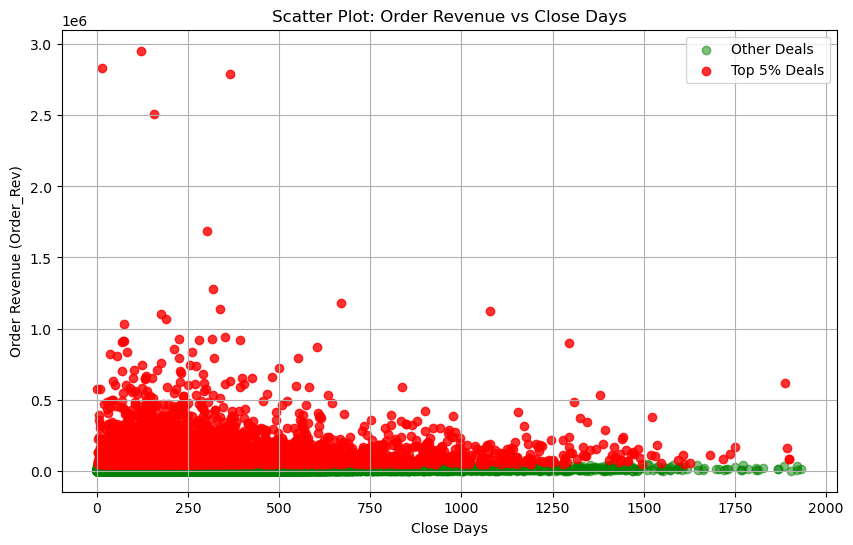

In [10]:
# Calculate the threshold for the top 5% deals
top_5_percent_threshold = df['Order_Rev'].quantile(0.95)

# Create two subsets: one for top 5% deals and one for others
top_deals = df[df['Order_Rev'] > top_5_percent_threshold]
other_deals = df[df['Order_Rev'] <= top_5_percent_threshold]

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Plot other deals
plt.scatter(other_deals['Close_Days'], other_deals['Order_Rev'], alpha=0.5, color='green', label='Other Deals')

# Highlight the top 5% deals
plt.scatter(top_deals['Close_Days'], top_deals['Order_Rev'], alpha=0.8, color='red', label='Top 5% Deals')

# Add title and labels
plt.title('Scatter Plot: Order Revenue vs Close Days')
plt.xlabel('Close Days')
plt.ylabel('Order Revenue (Order_Rev)')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

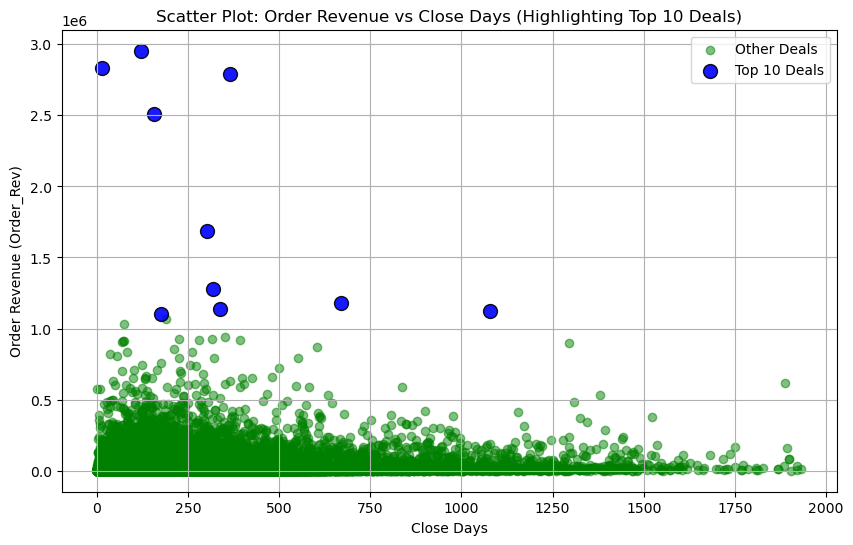

In [12]:
# Sort by Order_Rev in descending order and select the top 10 deals
top_10_deals = df.nlargest(10, 'Order_Rev')

# Create a subset for the remaining deals (excluding the top 10)
other_deals = df.drop(top_10_deals.index)

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Plot other deals
plt.scatter(other_deals['Close_Days'], other_deals['Order_Rev'], alpha=0.5, color='green', label='Other Deals')

# Highlight the top 10 deals
plt.scatter(top_10_deals['Close_Days'], top_10_deals['Order_Rev'], alpha=0.9, color='blue', s=100, label='Top 10 Deals', edgecolor='black')

plt.title('Scatter Plot: Order Revenue vs Close Days (Highlighting Top 10 Deals)')
plt.xlabel('Close Days')
plt.ylabel('Order Revenue (Order_Rev)')
plt.grid(True)

plt.legend()
plt.show()


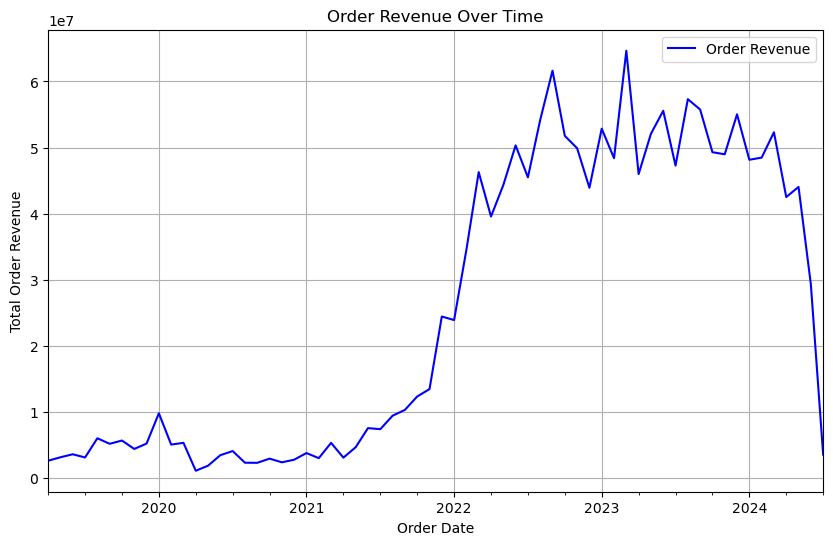

In [13]:
# Resample data by month and sum 'Order_Rev'
order_rev_over_time = df.resample('M', on='Order_Date')['Order_Rev'].sum()

# Plot the line graph for 'Order_Rev' over time
plt.figure(figsize=(10, 6))
order_rev_over_time.plot(kind='line', color='blue', label='Order Revenue')

plt.title('Order Revenue Over Time')
plt.ylabel('Total Order Revenue')
plt.xlabel('Order Date')
plt.legend()
plt.grid(True)
plt.show()

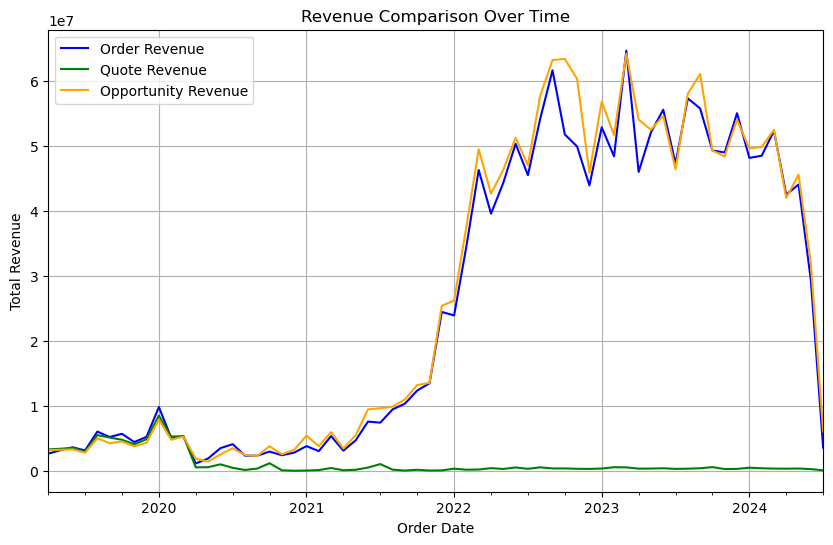

In [24]:
# Resample data by month and sum different revenue metrics
order_rev_over_time = df.resample('M', on='Order_Date')['Order_Rev'].sum()
quote_rev_over_time = df.resample('M', on='Order_Date')['Quote_Rev'].sum()
opp_rev_over_time = df.resample('M', on='Order_Date')['Opp_Rev'].sum()

# Plot the line graph for the different revenue metrics over time
plt.figure(figsize=(10, 6))

# Plot each revenue metric
order_rev_over_time.plot(kind='line', color='blue', label='Order Revenue')
quote_rev_over_time.plot(kind='line', color='green', label='Quote Revenue')
opp_rev_over_time.plot(kind='line', color='orange', label='Opportunity Revenue')

plt.title('Revenue Comparison Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Order Date')
plt.legend()
plt.grid(True)

plt.show()

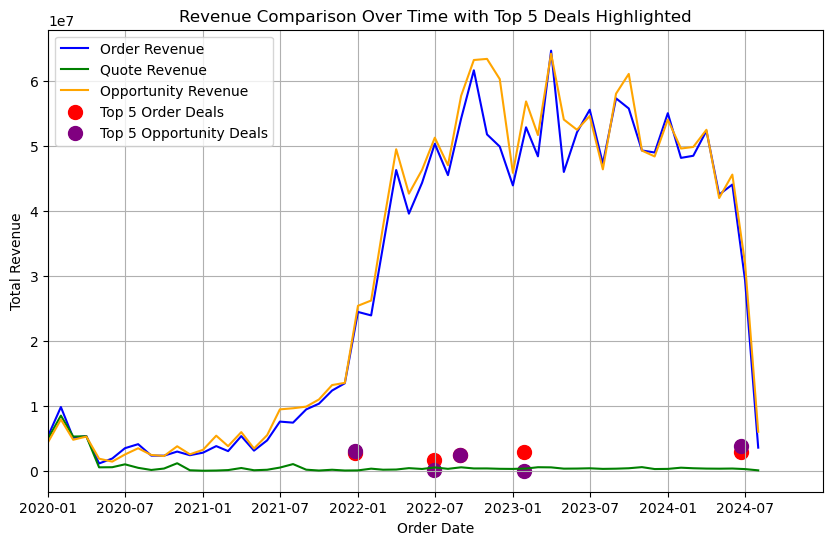

Top 5 Deals by Order Revenue:
    Order_Date   Order_Rev  Quote_Rev     Opp_Rev
263 2023-01-27  2954464.00       1.00    52700.00
279 2024-06-21  2832500.00       2.00  3835500.00
291 2021-12-23  2793909.27       2.00  3074354.86
339 2022-08-29  2509439.07       2.00  2510939.11
691 2022-06-29  1686438.02       0.15   178278.97


In [27]:
plt.figure(figsize=(10, 6))

# Plot the revenue time series
plt.plot(order_rev_over_time.index, order_rev_over_time, color='blue', label='Order Revenue')
plt.plot(quote_rev_over_time.index, quote_rev_over_time, color='green', label='Quote Revenue')
plt.plot(opp_rev_over_time.index, opp_rev_over_time, color='orange', label='Opportunity Revenue')

# Highlight top 5 deals for Order Revenue
plt.scatter(top_5_deals['Order_Date'], top_5_deals['Order_Rev'], color='red', s=100, label='Top 5 Order Deals')

# Highlight top 5 deals for Opportunity Revenue
plt.scatter(top_5_deals['Order_Date'], top_5_deals['Opp_Rev'], color='purple', s=100, label='Top 5 Opportunity Deals')

# Add title and labels
plt.title('Revenue Comparison Over Time with Top 5 Deals Highlighted')
plt.ylabel('Total Revenue')
plt.xlabel('Order Date')
plt.legend()

plt.show()
# Display the top 5 deals info below the graph
print("Top 5 Deals by Order Revenue:")
print(top_5_deals[['Order_Date', 'Order_Rev', 'Quote_Rev', 'Opp_Rev']])

### SAT / NPS vs Opp, Lead, and Quote

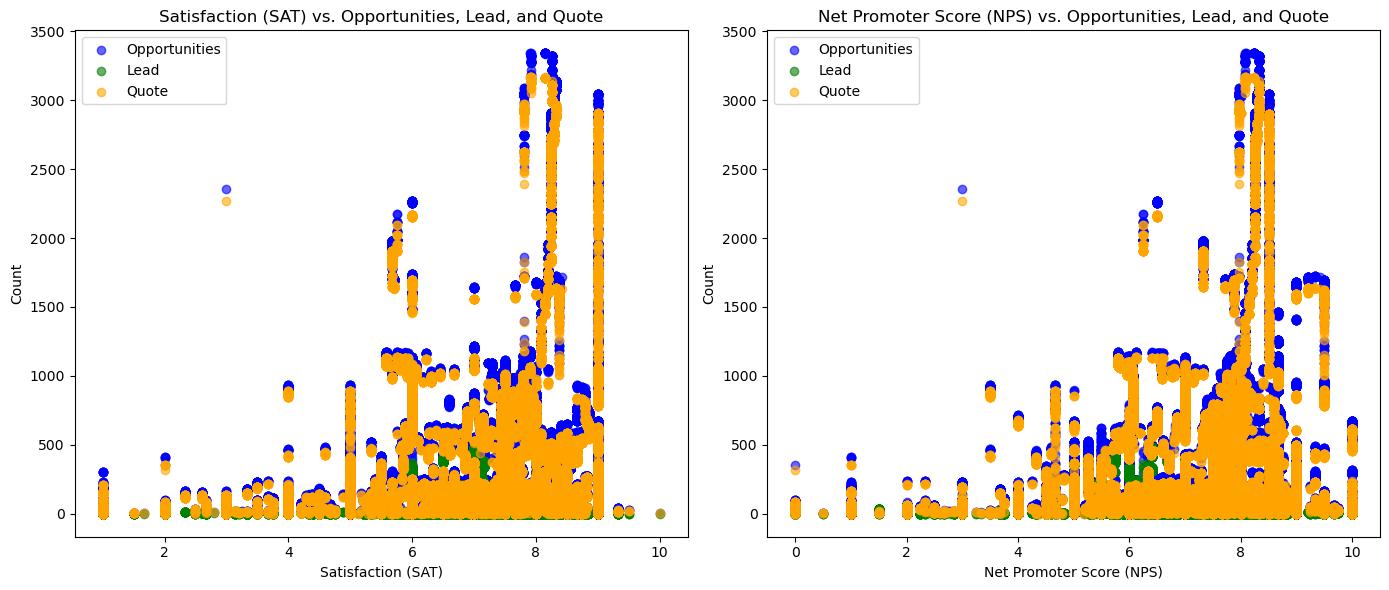

In [30]:
plt.figure(figsize=(14, 6))

# First subplot: SAT vs Opp, Lead, and Quote
plt.subplot(1, 2, 1)
plt.scatter(df['sat'], df['Opp'], color='blue', label='Opportunities', alpha=0.6)
plt.scatter(df['sat'], df['Lead'], color='green', label='Lead', alpha=0.6)
plt.scatter(df['sat'], df['Quote'], color='orange', label='Quote', alpha=0.6)
plt.title('Satisfaction (SAT) vs. Opportunities, Lead, and Quote')
plt.xlabel('Satisfaction (SAT)')
plt.ylabel('Count')
plt.legend()

# Second subplot:  vs Opp, Lead, and Quote
plt.subplot(1, 2, 2)
plt.scatter(df['nps'], df['Opp'], color='blue', label='Opportunities', alpha=0.6)
plt.scatter(df['nps'], df['Lead'], color='green', label='Lead', alpha=0.6)
plt.scatter(df['nps'], df['Quote'], color='orange', label='Quote', alpha=0.6)
plt.title('Net Promoter Score (NPS) vs. Opportunities, Lead, and Quote')
plt.xlabel('Net Promoter Score (NPS)')
plt.ylabel('Count')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


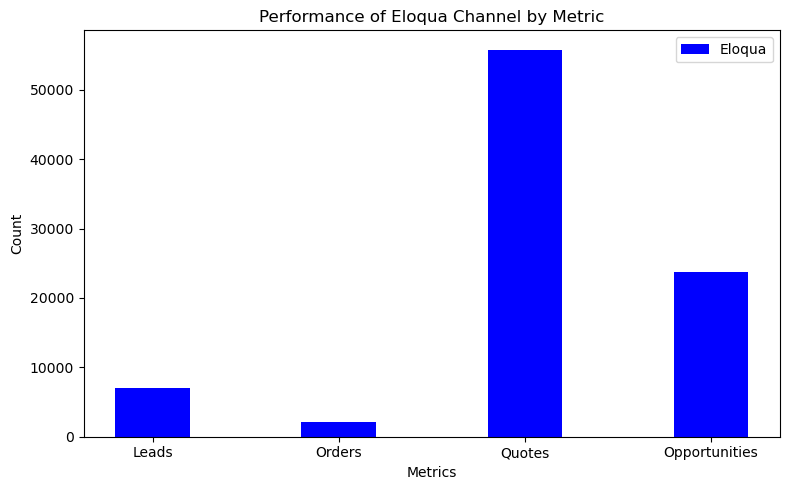

In [39]:
channels = ['Eloqua', 'Eloqua OC']

# Create a new DataFrame to hold the aggregated data
aggregated_data = {
    'Total_Opportunities': [],
    'Total_Leads': [],
    'Total_Orders': [],
    'Total_Quotes': []
}

# Loop through channels and aggregate data
for channel in channels:
    aggregated_data['Total_Opportunities'].append(df['Opp'].sum())  
    aggregated_data['Total_Leads'].append(df['Lead'].sum() * df[channel].sum())  
    aggregated_data['Total_Orders'].append(df['Order'].sum() * df[channel].sum())  

aggregated_df = pd.DataFrame(aggregated_data)


# Create a new DataFrame to hold the aggregated data for Eloqua
eloqua_data = {
    'Metric': ['Leads', 'Orders', 'Quotes','Opportunities'],
    'Count': [
        df['Lead'][df['Eloqua'] == 1].sum(),     # Total Leads from Eloqua
        df['Order'][df['Eloqua'] == 1].sum(),    # Total Orders from Eloqua
        df['Opp'][df['Eloqua'] == 1].sum(), # Total Opp from Eloqua
        df['Quote'][df['Eloqua'] == 1].sum()      # Total Quotes from Eloqua
    ]
}

# Convert to DataFrame
eloqua_df = pd.DataFrame(eloqua_data)

# Set the positions and width for the bars
x = np.arange(len(eloqua_df['Metric']))
bar_width = 0.4

# Create the bars
plt.figure(figsize=(8, 5))
plt.bar(x, eloqua_df['Count'], width=bar_width, label='Eloqua', color='blue')

plt.xlabel('Metrics')
plt.ylabel('Count')
plt.title('Performance of Eloqua Channel by Metric')
plt.xticks(x, eloqua_df['Metric'])
plt.legend()

plt.tight_layout()
plt.show()


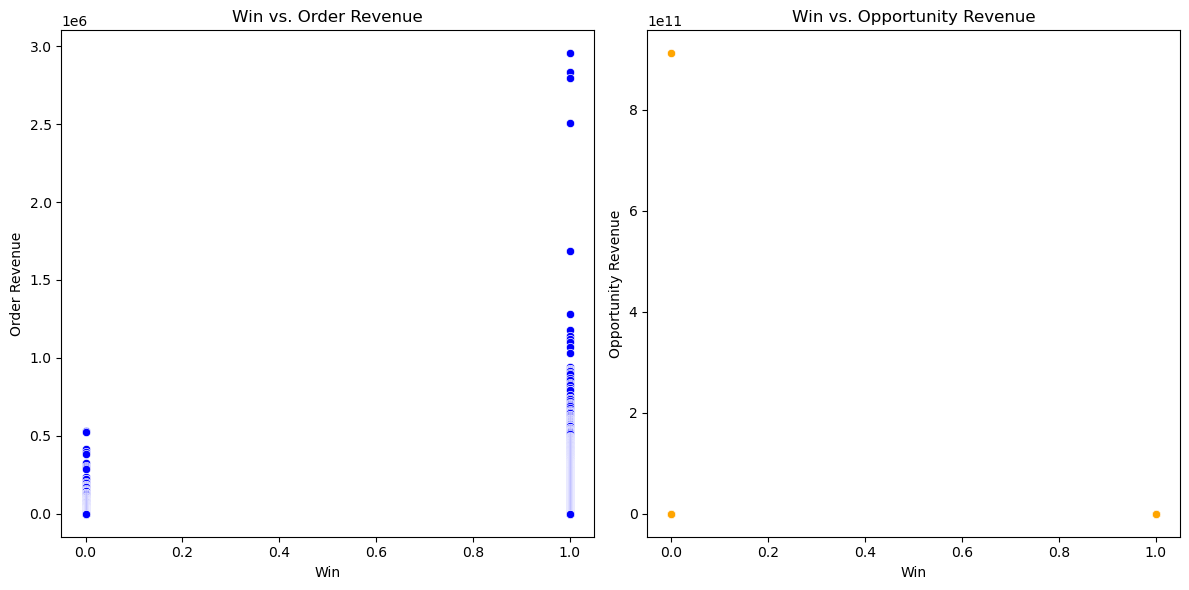

In [40]:
# Scatter plot for Win vs Order_Rev and Opp_Rev
plt.figure(figsize=(12, 6))

# Plot for Order Revenue
plt.subplot(1, 2, 1)
sns.scatterplot(x='Win', y='Order_Rev', data=df, color='blue')
plt.title('Win vs. Order Revenue')
plt.xlabel('Win')
plt.ylabel('Order Revenue')

# Plot for Opportunity Revenue
plt.subplot(1, 2, 2)
sns.scatterplot(x='Win', y='Opp_Rev', data=df, color='orange')
plt.title('Win vs. Opportunity Revenue')
plt.xlabel('Win')
plt.ylabel('Opportunity Revenue')

plt.tight_layout()
plt.show()


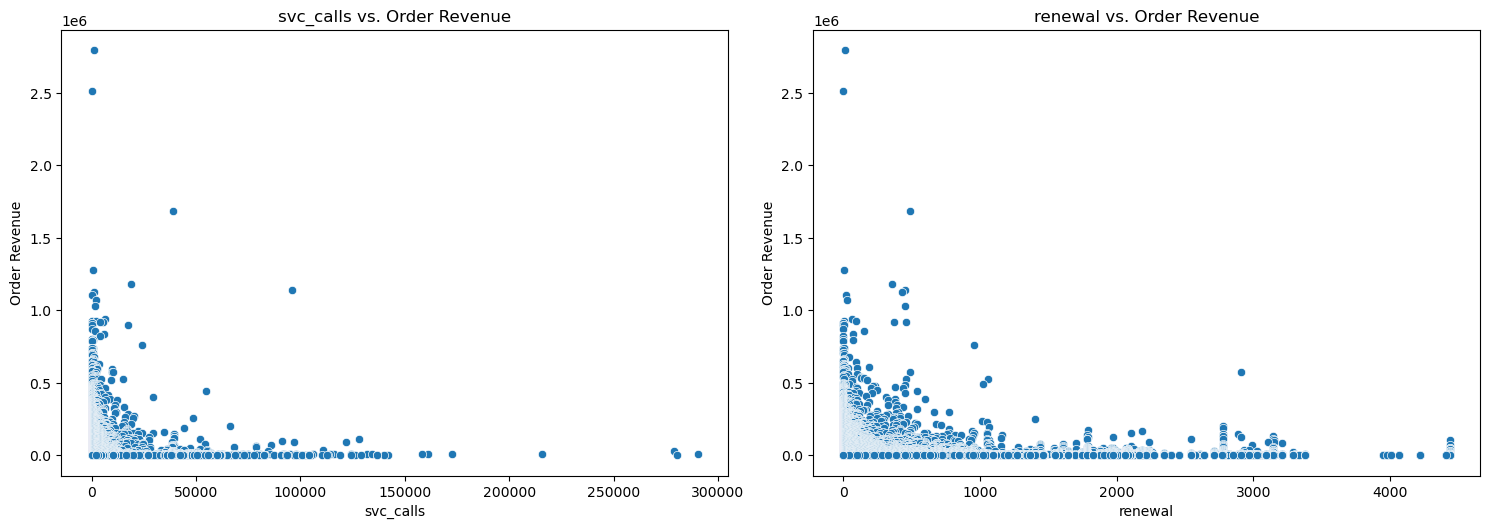

In [41]:
# Scatter plot for service-related features vs. Order_Rev
service_features = ['svc_calls', 'renewal']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(service_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='Order_Rev', data=df)
    plt.title(f'{feature} vs. Order Revenue')
    plt.xlabel(feature)
    plt.ylabel('Order Revenue')

plt.tight_layout()
plt.show()


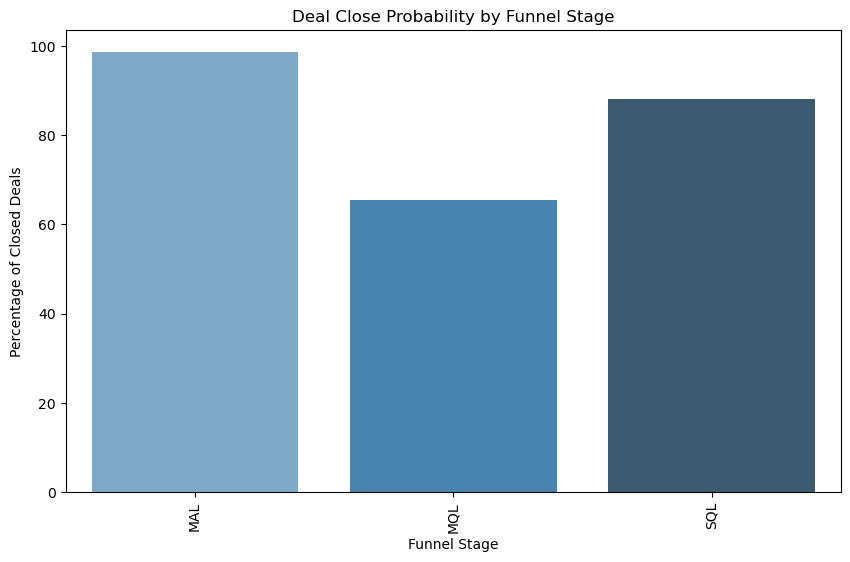

In [43]:
# Calculate percentage of closed deals by Funnel Stage
funnel_stage_closed = df.groupby('Funnel_Stage')['Closed'].mean() * 100

# Bar chart for Funnel Stage vs Deal Close Probability
plt.figure(figsize=(10, 6))
sns.barplot(x=funnel_stage_closed.index, y=funnel_stage_closed.values, palette='Blues_d')
plt.title('Deal Close Probability by Funnel Stage')
plt.ylabel('Percentage of Closed Deals')
plt.xlabel('Funnel Stage')
plt.xticks(rotation=90)
plt.show()


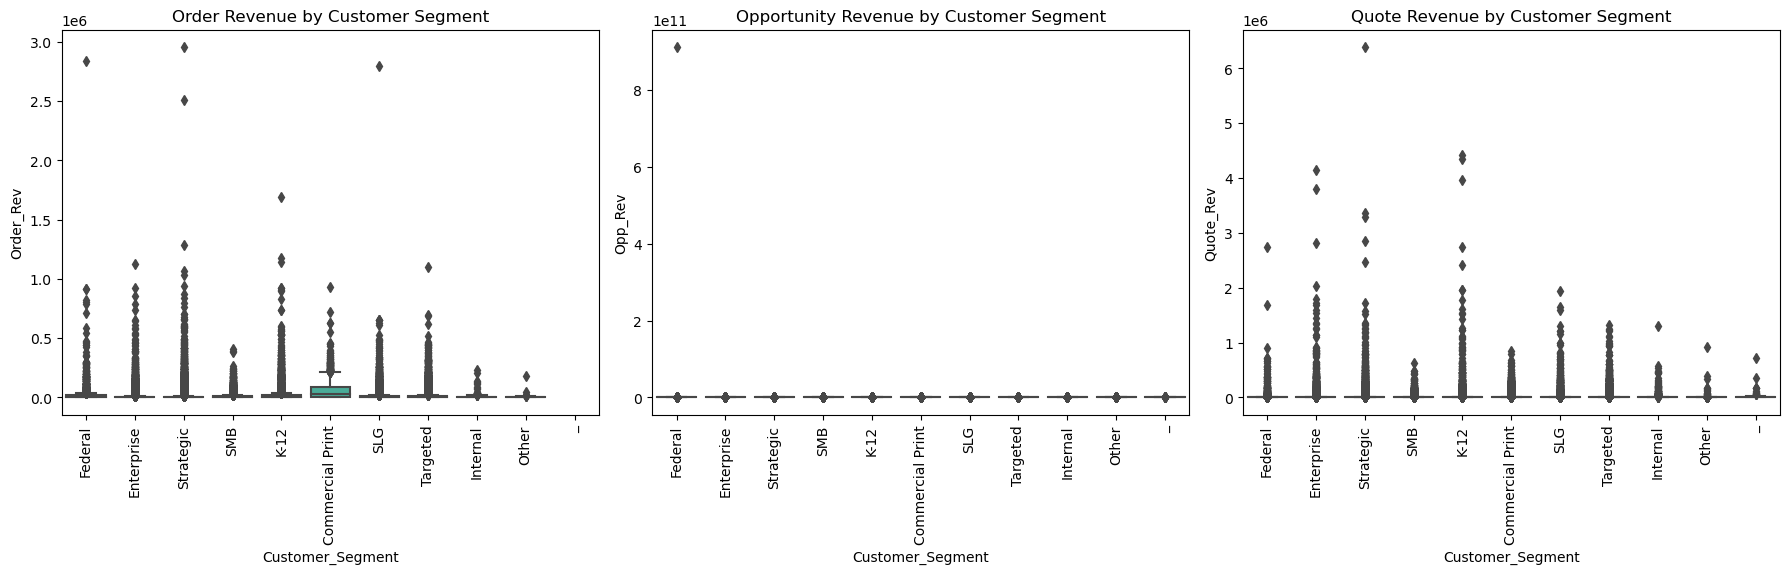

In [44]:
# Boxplot for Revenue by Customer Segment
plt.figure(figsize=(18, 6))

# Order Revenue by Customer Segment
plt.subplot(1, 3, 1)
sns.boxplot(x='Customer_Segment', y='Order_Rev', data=df)
plt.xticks(rotation=90)
plt.title('Order Revenue by Customer Segment')

# Opportunity Revenue by Customer Segment
plt.subplot(1, 3, 2)
sns.boxplot(x='Customer_Segment', y='Opp_Rev', data=df)
plt.xticks(rotation=90)
plt.title('Opportunity Revenue by Customer Segment')

# Quote Revenue by Customer Segment
plt.subplot(1, 3, 3)
sns.boxplot(x='Customer_Segment', y='Quote_Rev', data=df)
plt.xticks(rotation=90)
plt.title('Quote Revenue by Customer Segment')

plt.tight_layout()
plt.show()


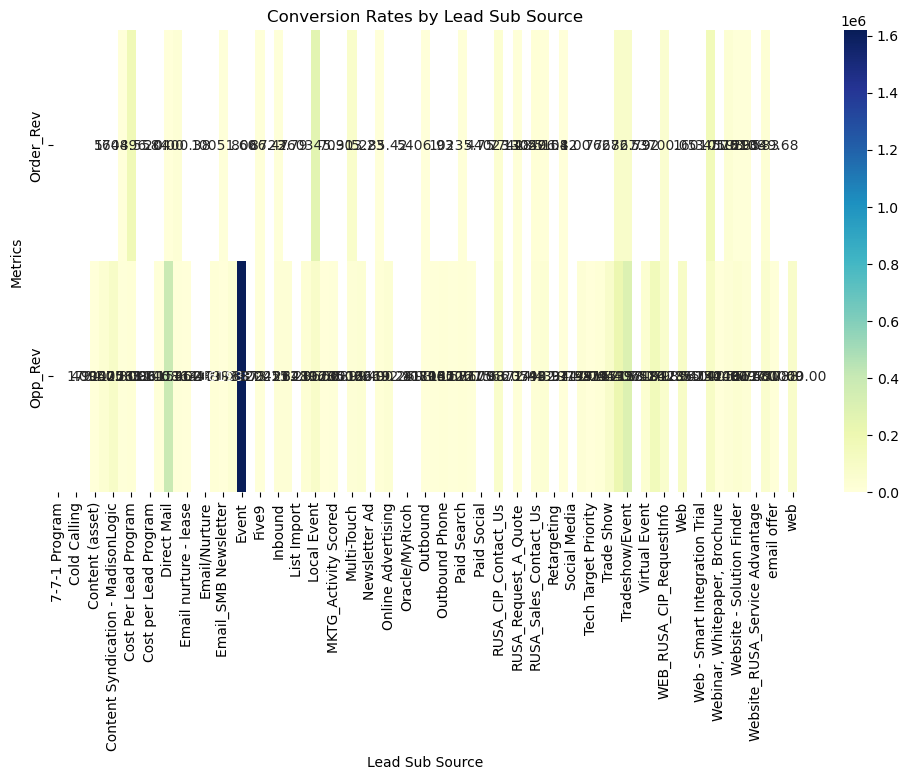

In [46]:
# Calculate conversion rates by Lead Sub Source
conversion_rates = df.groupby('Lead_Sub_Source').agg({'Order_Rev': 'mean', 'Opp_Rev': 'mean'}).reset_index()

# Heatmap for conversion rates
plt.figure(figsize=(12, 6))
sns.heatmap(conversion_rates.set_index('Lead_Sub_Source').T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Conversion Rates by Lead Sub Source')
plt.ylabel('Metrics')
plt.xlabel('Lead Sub Source')
plt.show()
